In [1]:
!pip install -e ../

Obtaining file:///home/dg22309/Desktop/bayes_evals
  Preparing metadata (setup.py) ... done
  Attempting uninstall: bayes_evals
    Found existing installation: bayes_evals 0.1
    Uninstalling bayes_evals-0.1:
      Successfully uninstalled bayes_evals-0.1
  DEPRECATION: Legacy editable install of bayes_evals==0.1 from file:///home/dg22309/Desktop/bayes_evals (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for bayes_evals


In [1]:
import bayes_evals as be
import pandas as pd

In [2]:
# Load the data (should NOT contain an index column)
eval_data = pd.read_csv('data/langchain_data_tool_use_FULL.csv')
print(f"Data shape: {eval_data.shape}")
print(eval_data)

Data shape: (20, 9)
    claude-2.1  mixtral-8x7b-instruct  mistral-7b-instruct  \
0          1.0                    0.0                  1.0   
1          1.0                    1.0                  0.0   
2          1.0                    1.0                  0.0   
3          1.0                    0.0                  0.0   
4          1.0                    1.0                  0.0   
5          1.0                    1.0                  0.0   
6          1.0                    1.0                  0.0   
7          1.0                    1.0                  0.0   
8          1.0                    0.0                  0.0   
9          1.0                    1.0                  0.0   
10         1.0                    0.0                  0.0   
11         1.0                    1.0                  0.0   
12         1.0                    1.0                  0.0   
13         1.0                    1.0                  0.0   
14         1.0                    1.0             

Getting independent indep_intervals
       claude-2.1  mixtral-8x7b-instruct  mistral-7b-instruct  \
lower    0.838902               0.384354             0.011749   
upper    0.998795               0.781803             0.238160   

       gpt-3.5-turbo-0613-openai (functions)  gpt-3.5-turbo-1106 (functions)  \
lower                               0.297807                        0.112809   
upper                               0.702193                        0.471660   

       gpt-4-0613 (functions)  gpt-4-1106-preview (functions)  \
lower                0.218197                        0.696226   
upper                0.615646                        0.969511   

       llama-v2-13b-chat  llama-v2-70b-chat  
lower           0.001205           0.030489  
upper           0.161098           0.303774  


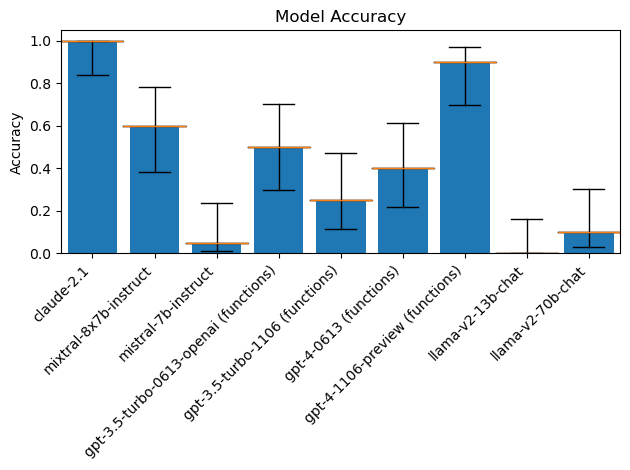

In [3]:
# Get the results either for individual LLMs (each column in the data)...
print("Getting independent indep_intervals")
indep_intervals = be.independent_intervals(eval_data)
print(indep_intervals)
be.plot_intervals(eval_data, indep_intervals)

Getting independent comparisons
                                       claude-2.1  mixtral-8x7b-instruct  \
claude-2.1                                    NaN                 0.9992   
mixtral-8x7b-instruct                      0.0008                    NaN   
mistral-7b-instruct                        0.0000                 0.0000   
gpt-3.5-turbo-0613-openai (functions)      0.0001                 0.2702   
gpt-3.5-turbo-1106 (functions)             0.0000                 0.0148   
gpt-4-0613 (functions)                     0.0000                 0.1098   
gpt-4-1106-preview (functions)             0.1176                 0.9827   
llama-v2-13b-chat                          0.0000                 0.0001   
llama-v2-70b-chat                          0.0000                 0.0007   

                                       mistral-7b-instruct  \
claude-2.1                                          1.0000   
mixtral-8x7b-instruct                               1.0000   
mistral-7b-instruct  

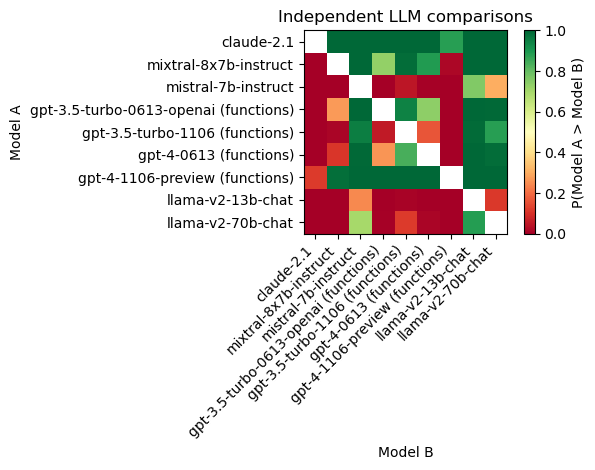

In [4]:
# ... in which case you can also do independent LLM comparisons...
print("Getting independent comparisons")
indep_comparisons = be.independent_comparisons(eval_data)
print(indep_comparisons)
be.plot_comparisons(indep_comparisons, title="Independent LLM comparisons")

Getting paired comparisons


                                       claude-2.1  mixtral-8x7b-instruct  \
claude-2.1                                    NaN                 0.9988   
mixtral-8x7b-instruct                      0.0004                    NaN   
mistral-7b-instruct                        0.0000                 0.0008   
gpt-3.5-turbo-0613-openai (functions)      0.0000                 0.2516   
gpt-3.5-turbo-1106 (functions)             0.0000                 0.0147   
gpt-4-0613 (functions)                     0.0001                 0.1063   
gpt-4-1106-preview (functions)             0.1247                 0.9957   
llama-v2-13b-chat                          0.0000                 0.0002   
llama-v2-70b-chat                          0.0000                 0.0004   

                                       mistral-7b-instruct  \
claude-2.1                                          1.0000   
mixtral-8x7b-instruct                               0.9993   
mistral-7b-instruct                                  

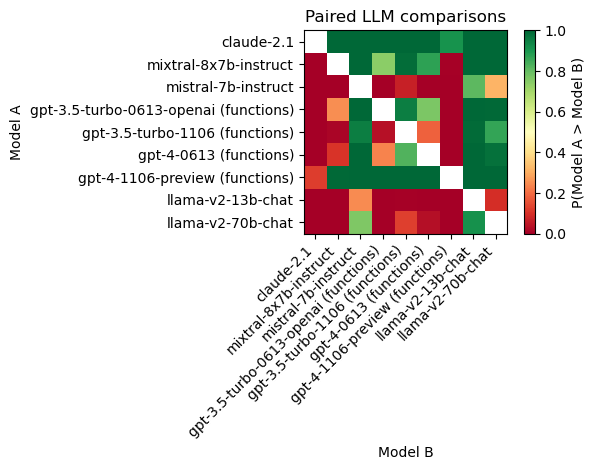

In [5]:
# ... or get pairwise comparisons between LLMs
print("Getting paired comparisons")
paired_comparisons = be.paired_comparisons(eval_data)
print(paired_comparisons)
be.plot_comparisons(paired_comparisons, title="Paired LLM comparisons")